### Assignment: Data Analysis with FFT, Outlier Removal, Feature Extraction, and PCA

##### Importing the Libraries required for this project

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##### 1. Load the Dataset
##### In this section, we'll load the dataset from a CSV file and take a quick look at the data.
##### Replace 'your_dataset.csv' with the actual path to your dataset file.

In [4]:
df = pd.read_csv('/home/keshav/Desktop/Data Science Assignments/lab_data.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,Bz,I,Azimuth,Pitch,Roll,Gain,Latitude,Longitude,Speed (m/s),Unnamed: 21
0,0.143991,0.1463,0.4288,0.8387,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,-∞,0.000000,0.000000,0.00,NaN
1,0.146112,0.1463,0.4288,0.8387,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,0.0,17.7525,0.0,0.0,0.0,-∞,23.545176,87.290216,1.03,NaN
2,0.146485,0.1463,0.4288,0.8387,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,0.0,14.7825,0.0,0.0,0.0,-∞,23.545176,87.290216,1.03,NaN
3,0.146784,0.1780,0.3925,0.7691,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,0.0,14.7825,0.0,0.0,0.0,-∞,23.545176,87.290216,1.03,NaN
4,0.200157,0.1780,0.3925,0.7691,0.0,0.0,0.0,-0.4884,-0.2989,-0.1511,...,0.0,14.7825,0.0,0.0,0.0,-∞,23.545176,87.290216,1.03,NaN


##### 2. Convert to Frequency Domain (FFT)
##### We'll apply the Fast Fourier Transform (FFT) to one of the time-domain features (e.g., 'gFx').
##### This will allow us to analyze the frequency components of the signal.

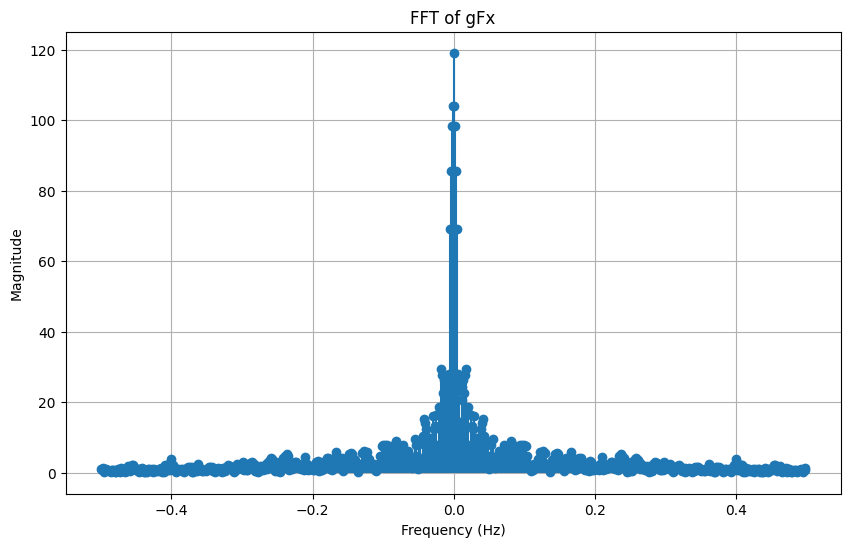

In [7]:
# Define the signal (time-domain data)
signal = df['gFx']

# Perform FFT
n = len(signal)
fft_values = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n)

# Plot the frequency components using a stem plot
plt.figure(figsize=(10, 6))
plt.stem(frequencies, np.abs(fft_values), basefmt=" ")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of gFx')
plt.grid(True)
plt.show()

##### 3. Outlier Removal (Column-wise)
##### Outliers can distort the analysis, so we'll remove them using the Interquartile Range (IQR) method.
##### This method identifies outliers as points that lie beyond 1.5 times the IQR from the first or third quartile.

In [10]:
def remove_outliers(df):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the dataframe to remove outliers
    df_clean = df_numeric[~((df_numeric < lower_bound) | (df_numeric > upper_bound)).any(axis=1)]
    
    return df_clean

# Apply the outlier removal function
df_clean = remove_outliers(df)

# Display the dataset after outlier removal
print("Dataset after Outlier Removal:")
df_clean.head()


Dataset after Outlier Removal:


,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,By,Bz,I,Azimuth,Pitch,Roll,Latitude,Longitude,Speed (m/s),Unnamed: 21
12,0.264020,-0.0938,0.3988,0.9016,0.0516,0.28,-0.5374,-0.1679,-0.6116,0.1760,...,-12.8222,-23.2654,14.7825,268.4034,-26.0781,4.6912,23.545176,87.290216,1.03,NaN
13,0.270045,-0.0060,0.4149,0.8236,0.0516,0.28,-0.5374,-0.1679,-0.6116,0.1760,...,-12.8222,-23.2654,14.7825,268.4034,-26.0781,4.6912,23.545176,87.290216,1.03,NaN
14,0.271598,0.1070,0.4112,0.7493,0.0516,0.28,-0.5374,-0.1679,-0.6116,0.1760,...,-12.8222,-23.2654,14.7825,268.4034,-26.0781,4.6912,23.545176,87.290216,1.03,NaN
15,0.273080,0.1191,0.4517,0.7251,0.0516,0.28,-0.5374,-0.1679,-0.6116,0.1760,...,-12.8222,-23.2654,14.7825,268.4034,-26.0781,4.6912,23.545176,87.290216,1.03,NaN
16,0.321065,0.1191,0.4517,0.7251,0.0516,0.28,-0.5374,-0.1294,0.0214,0.2517,...,-12.8222,-23.2654,14.7825,268.4034,-26.0781,4.6912,23.545176,87.290216,1.03,NaN


##### 4. Feature Extraction
##### We'll extract two features: one from the time-domain data and one from the frequency-domain data.
##### Time-Domain Feature: We'll calculate the mean of the 'gFx' column.
##### Frequency-Domain Feature: We'll identify the dominant frequency from the FFT results.

In [13]:
# Time-Domain Feature (Mean of gFx)
time_domain_feature = df_clean['gFx'].mean()
print(f"Time-Domain Feature (Mean of gFx): {time_domain_feature}")

# Frequency-Domain Feature (Dominant Frequency)
dominant_frequency = frequencies[np.argmax(np.abs(fft_values))]
print(f"Frequency-Domain Feature (Dominant Frequency): {dominant_frequency} Hz")

Time-Domain Feature (Mean of gFx): 0.009481198910081746
Frequency-Domain Feature (Dominant Frequency): 0.0 Hz


##### Summary
##### In this notebook, we have successfully:
##### - Loaded and previewed the dataset.
##### - Applied FFT to convert time-domain data to the frequency domain and visualized the results.
##### - Identified and removed outliers from the dataset.
##### - Extracted one feature from the time-domain data and another from the frequency-domain data.
##### - Performed PCA to reduce the dimensionality of the data and visualized the principal components.